# Chapter 1:

## Practicals Deep Learning for Coders With Fastai and Pytorch Book

# Setting up your local environment

Use the following steps to set up your local machine learning / deep learning infrastructure:

First is to install Python

Second is to install Pytorch library. Use the link below to generate the appropriate code to run at your terminal or command prompt. Use stable, select your OS, Package, Language, and CPU settings. Copy the generated code and run at your terminal. https://pytorch.org/get-started/locally/ 

Third is to install fastai library and this link has the code to run at your terminal https://docs.fast.ai/ (Note check the windows support too and leave out the –c pytorch since you have already installed it in step 2)

Fourth is to install Jupyter notebook. Also, install dependencies for Jupyter notebook at your terminal using either
Conda install –c conda-forge jupyter_contrib_nbextensions 
or
Pip install jupyter_contrib_nbexttensions

## Testing your local environment
Test your installations and libraries by running python and try importing the libraries as follows:

1. import torch
2. import fastai

If you successed importing this libraries, your environment will be ready for building your cats and dogs image classifier and running all the code in Deep Learning for Coders With Fastai and Pytorch Book by Jeremy, Sylvain and Alexis. 

# The cats and dogs image classifier

In [1]:
"""
First is to import fastai.vision library
This gives us all of the functions and classes we will need to create a wide variety of computer vision models.

"""
from fastai.vision.all import *
from fastai.metrics import error_rate
from ipywidgets import HBox,VBox,widgets,Button,Checkbox,Dropdown,Layout,Box,Output,Label,FileUpload

In [5]:
"""
Second: Download the dataset of cats and dogs photos, extract them to a folder named 'images' and return
a Path object with the extracted location: 

"""
# URLs.PETS # shows the url containing the dataset

path = untar_data(URLs.PETS)/'images'

# print(path)
# print(f'Total images downloaded are: {len(path.ls())}')

C:\Users\ERLLAP\.fastai\data\oxford-iiit-pet\images
Total images downloaded are: 7393


In [6]:
"""
In the dataset, image filenames start with an uppercase letter if the image is a cat, and a lowercase letter otherwise.
We define a function is_cat, to labels images based on a filename rule provided by the dataset’s creators:
This function checks whether the filename isupper or not. It evaluates to True if it is upper and False otherwise.

"""
def is_cat(x): return x[0].isupper() 

In [7]:
"""
Third is to prepare the dataset for loading in our model
There are various classes for different kinds of deep learning datasets and problems—here we’re using ImageDataLoaders 
since we are working with images.

The from_name_func tells fastai to get labels from filenames.
This means that filenames can be extracted using a function applied to the filename and 
passing x[0].isupper(), evaluates to True if the first letter is uppercase (i.e., it’s a cat). 
as described in is_cat function above.

path provides access to the main folder containing our dogs & cats images

get_image_files() function gets every image in the main folder('images'). 

valid_pct = 0.2 tell fastai to hold 20% of the dataset and not to use it for traing the model
This 20% of the data is called the validation set and used to measure the accuracey of the model; 
the remaining 80% is called the training set.The validation set is selected randomly and 
the parameter seed=42 sets the random seed to the same value every time we run this code, which means we
get the same validation set every time we run it

image transforms resizes the images to 224 pixels (grabs the middle of the image and trims it 224 x 224 squared)

"""
dls = ImageDataLoaders.from_name_func(path, get_image_files(path), valid_pct=0.2, seed = 42,
                                      label_func=is_cat, item_tfms=Resize(224))


Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


In [8]:
"""
Fourth is to creat an object / an instance of a cnn_learner class and call it (learn)

Using the cnn_learner class, we pass it our defined method of loading the dataset (dls),
the model we want to use "resnet34" 34 here refers to the number of layers in this variant of the architecture 
(other options are 18, 50, 101, and 152), and a measure of performance (error rate) - to measure the percentage
(%) of images of validation set that will be classified incorectly as arguments.

The learn object is now our pretrained model templet (architecture of mathematical functions) and 
is ready for fitting to our cats and dogs dataset

"""
learn = cnn_learner(dls, resnet34, metrics=error_rate)

C:\Users\ERLLAP\Anaconda3\lib\site-packages\torch\nn\functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ..\c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


In [6]:
"""
Fifth is to fit our model to the dataset

Calling fine_tune() method on the learn object (our model) and passing it the number of times to look at each image (epoch)
fitting the model on data is updatig the models parameters (weights)

An epoch is a complete pass through the dataset.

After each epoch, a measure of performance used for training the mobel is printed.

"""
learn.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.172687,0.020330,0.005413,2:12:58


epoch,train_loss,valid_loss,error_rate,time
0,0.046854,0.019792,0.004060,12:01:27


But why is the method called fine_tune, and not fit? fastai does
have a method called fit, which does indeed fit a model (i.e., look
at images in the training set multiple times, each time updating the
parameters to make the predictions closer and closer to the target
labels). But in this case, we’ve started with a pretrained model, and
we don’t want to throw away all those capabilities that it already has.

fine_tune() is one method of adapting a pretrained model for a new dataset. This is called "transfer learning" - a technique that updates the parameters of a pretrained model by training for additional epochs using a different task from that used for pretraining.

In [4]:
"""
Sixth is checking whether the model works (Making inference)
Creat a button (file upload widget) for uploading an image and use it to upload any other imgae or any downloaded image

"""
uploader = widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

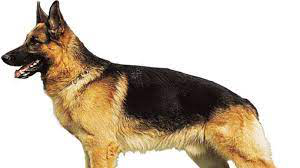

In [15]:
"""
Use the python PIL library to display the image you uploaded above
"""
img = PILImage.create(uploader.data[0])
img

In [16]:
"""
Using our model for making infrerences
call the predict method on our traimned model (learn). the method passes our uploaded image as an argument
Finally create three variables for receiving the output from the predict method (that is: is_cat, _ , Probs)

"""
is_cat,_,probs = learn.predict(img)
print(f"Is this a cat?: {is_cat}.")
print(f"Probability it's a cat: {probs[1].item():.6f}")

Is this a cat?: False.
Probability it's a cat: 0.000436


# Deep Learning is Not Just for Image Classification 

# Image Segmentation

Segmentation is creating a model that can recognize the content of every individual pixel in an image. This is mainly important for autonomous vehicles; localizing objects in a picture.If a self-driving car doesn’t know where a pedestrian is, then it doesn’t know how to avoid one!

Here is how we can train a segmentation model with fastai, using a subset of the CamVid dataset from the paper “Semantic Object Classes in Video: A High-Definition Ground Truth Database” by Gabriel J. Brostow et
al.

In [30]:
path2 = untar_data(URLs.CAMVID_TINY)
print(path2)
print(len(path2.ls()))
print(path2.ls())

C:\Users\ERLLAP\.fastai\data\camvid_tiny
3
[Path('C:/Users/ERLLAP/.fastai/data/camvid_tiny/codes.txt'), Path('C:/Users/ERLLAP/.fastai/data/camvid_tiny/images'), Path('C:/Users/ERLLAP/.fastai/data/camvid_tiny/labels')]


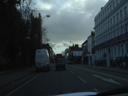

In [27]:
p = (path2/'images').ls()
p1 = p[2]
img = Image.open(p1)
img

In [12]:
#import numpy as np

dls2 = SegmentationDataLoaders.from_label_func(path2, bs=8, fnames = get_image_files(path2/"images"), label_func = lambda o: path2/'labels'/f'{o.stem}_P{o.suffix}', codes = np.loadtxt(path2/'codes.txt', dtype=str))


Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


In [13]:
learn2 = unet_learner(dls2, resnet34)

In [14]:
learn2.fine_tune(8)

epoch,train_loss,valid_loss,time
0,3.321279,2.880773,02:40


epoch,train_loss,valid_loss,time
0,1.902506,1.524488,03:08
1,1.630087,1.363181,03:18
2,1.467115,1.087290,03:20
3,1.312838,0.918059,03:20
4,1.178776,0.859271,03:24
5,1.068600,0.772831,03:37
6,0.979371,0.722886,03:38
7,0.905115,0.720475,03:27


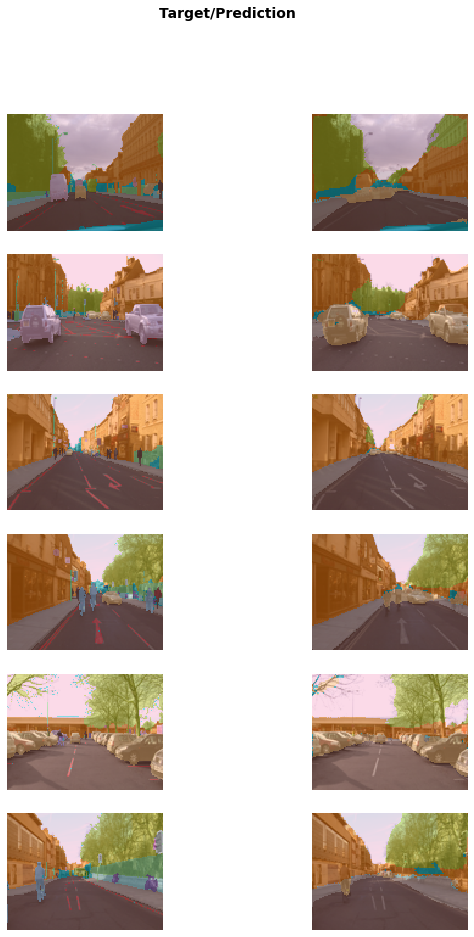

In [16]:
learn2.show_results(max_n=6, figsize=(10,15))

We can visualize how well it achieved its task by asking the model to color-code each pixel of an image. As you can see, it nearly perfectly classifies every pixel in every object. For instance, notice that all of the cars are overlaid with the same color, and all of the trees are overlaid with the same color (in each pair of images, the lefthand image is the ground truth label, and the right is the prediction from the model):

# Natural Language Processing - Text

One other area where deep learning has dramatically improved in the last couple of years is natural language processing (NLP). Computers can now generate text, translate automatically from one language to another, analyze comments, label words in sentences, and much more. Here is all of the code necessary to train a model that can classify the sentiment of a movie review better than anything that existed in the world just five years ago:

In [2]:
from fastai.text.all import *

In [6]:
URLs.IMDB #link to download the dataset

'https://s3.amazonaws.com/fast-ai-nlp/imdb.tgz'

In [3]:
"""
Upload the dataset in your jupyter notebook and extract it using the below code

"""
import tarfile
tf = tarfile.open('imdb.tgz')
tf.extractall() #The function extracts the file and saves it in a file name that is passed as an argument in the method

In [4]:
"""
Set the path to the extracted folder
"""
path3 = Path('imdb')

In [ ]:
dls3 = TextDataLoaders.from_folder(path3, valid='test')

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `n_workers` has to be changed to 0 to avoid getting stuck


In [ ]:
#learn3 = text_classifier_learner(dls3, AWD_LSTM, drop_mult=0.5, metrics=accuracy)

In [ ]:
#learn3.fine_tune(4, 1e-2)

This model is using the IMDb Large Movie Review dataset from “Learning Word Vectors for Sentiment Analysis” by Andrew Maas et
al. It works well with movie reviews of many thousands of words, but let’s test it on a short one to see how it works:

In [ ]:
#learn3.predict("I really liked that movie!")

Here we can see the model has considered the review to be positive. The second part of the result is the index of “pos” in our data vocabulary, and the last part is the probabilities attributed to each class (99.6% for “pos” and 0.4% for “neg”).

# Tabular Data

Data that is in the form of a table, such as from a spreadsheet, database, or a comma-separated values (CSV) file. A tabular model is a model that tries to predict one column of a table based on information in other columns of the table.

Here is the code necessary to train a model that will predict whether a person is a high-income earner, based on their socioeconomic background:

In [5]:
from fastai.tabular.all import *

# URLs.ADULT_SAMPLE # Link to the dataset

path4 = untar_data(URLs.ADULT_SAMPLE) # Download and extrat the dataset and return the path object

dls4 = TabularDataLoaders.from_csv(path4/'adult.csv', path4=path4, y_names="salary",
                                  cat_names = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race'], 
                                  cont_names = ['age', 'fnlwgt', 'education-num'], 
                                  procs = [Categorify, FillMissing, Normalize])

learn4 = tabular_learner(dls4, metrics=accuracy)

"""
As you see, we had to tell fastai which columns are categorical
(contain values that are one of a discrete set of choices, such as occupation) 
versus continuous (contain a number that represents a quantity, such as age).

"""

'\nAs you see, we had to tell fastai which columns are categorical\n(contain values that are one of a discrete set of choices, such as\noccupation) versus continuous (contain a number that represents\na quantity, such as age).\n\n'

In [6]:
"""
There is no pretrained model available for this task (in general,
pretrained models are not widely available for any tabular modeling
tasks, although some organizations have created them for internal
use), so we don’t use fine_tune in this case. Instead, we use
fit_one_cycle, the most commonly used method for training
fastai models from scratch (i.e., without transfer learning):
"""

learn4.fit_one_cycle(3)

epoch,train_loss,valid_loss,accuracy,time
0,0.390318,0.361423,0.834306,00:12
1,0.366361,0.346386,0.841830,00:12
2,0.355290,0.343228,0.844134,00:12


This model is using the Adult dataset from the paper “Scaling Up the Accuracy of Naive-Bayes Classifiers: a Decision-Tree Hybrid” by Ron Kohavi, which contains some demographic data about individuals (like their education, marital status, race, sex and whether they have an annual income greater than $50k). The model is over 80% accurate and took around 30 seconds to train.

# Recommendation systems

Recommendation systems are important, particularly in ecommerce. Companies like Amazon and Netflix try hard to recommend products or movies that users might like. Here’s how to train a model that will predict movies people might like based
on their previous viewing habits, using the MovieLens dataset:

In [6]:
from fastai.collab import *
# URLs.ML_SAMPLE
path5 = untar_data(URLs.ML_SAMPLE)
dls5 = CollabDataLoaders.from_csv(path5/'ratings.csv')
learn5 = collab_learner(dls5, y_range=(0.5,5.5))
learn5.fine_tune(10)

epoch,train_loss,valid_loss,time
0,1.514003,1.404538,00:01


epoch,train_loss,valid_loss,time
0,1.373630,1.345217,00:01
1,1.270564,1.167073,00:01
2,1.017298,0.881231,00:01
3,0.784306,0.760844,00:01
4,0.678003,0.732018,00:01
5,0.640208,0.722536,00:01
6,0.616377,0.718016,00:01
7,0.605775,0.715874,00:01
8,0.592684,0.715276,00:01
9,0.598023,0.715120,00:01


This model is predicting movie ratings on a scale of 0.5 to 5.0 to
within around 0.6 average error. Since we’re predicting a continuous
number, rather than a category, we have to tell fastai what range our
target has, using the y_range parameter.
Although we’re not actually using a pretrained model (for the same
reason that we didn’t for the tabular model), this example shows that
fastai lets us use fine_tune anyway in this case
Sometimes it’s best to experiment
with fine_tune versus fit_one_cycle to see which works
best for your dataset.

In [7]:
"""
We can use the same show_results call we saw earlier to view a
few examples of user and movie IDs, actual ratings, and predictions:
"""
learn5.show_results()

,userId,movieId,rating,rating_pred
0,2.0,73.0,4.0,4.115170
1,62.0,19.0,1.0,2.662266
2,13.0,71.0,2.0,4.174845
3,40.0,59.0,4.0,3.814575
4,10.0,59.0,2.5,4.037995
5,18.0,36.0,4.0,3.446334
6,45.0,8.0,2.0,3.139741
7,85.0,40.0,3.0,3.670627
8,39.0,26.0,3.5,3.847347
